<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-&amp;-Packages" data-toc-modified-id="Import-Data-&amp;-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data &amp; Packages</a></span></li><li><span><a href="#EDA-&amp;-Cleaning" data-toc-modified-id="EDA-&amp;-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA &amp; Cleaning</a></span><ul class="toc-item"><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary Statistics</a></span></li><li><span><a href="#Normality-Check" data-toc-modified-id="Normality-Check-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Normality Check</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Exploring-Features" data-toc-modified-id="Exploring-Features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Exploring Features</a></span><ul class="toc-item"><li><span><a href="#States" data-toc-modified-id="States-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>States</a></span></li><li><span><a href="#Area-Code" data-toc-modified-id="Area-Code-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Area Code</a></span></li><li><span><a href="#Account-Length" data-toc-modified-id="Account-Length-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Account Length</a></span></li><li><span><a href="#Churn:-Target-Variable" data-toc-modified-id="Churn:-Target-Variable-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Churn: Target Variable</a></span></li></ul></li></ul></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encode-Categorical-Data" data-toc-modified-id="One-Hot-Encode-Categorical-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>One-Hot-Encode Categorical Data</a></span></li><li><span><a href="#Separate-Target-&amp;-Predictor-Variables" data-toc-modified-id="Separate-Target-&amp;-Predictor-Variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Separate Target &amp; Predictor Variables</a></span></li><li><span><a href="#Address-Class-Imbalance" data-toc-modified-id="Address-Class-Imbalance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Address Class Imbalance</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Classifier" data-toc-modified-id="Logistic-Regression-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression Classifier</a></span><ul class="toc-item"><li><span><a href="#Fit-Model-&amp;-Predict" data-toc-modified-id="Fit-Model-&amp;-Predict-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Fit Model &amp; Predict</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Accuracy-Scores" data-toc-modified-id="Confusion-Matrix-&amp;-Accuracy-Scores-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Confusion Matrix &amp; Accuracy Scores</a></span></li></ul></li><li><span><a href="#KNN-Classifier" data-toc-modified-id="KNN-Classifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>KNN Classifier</a></span><ul class="toc-item"><li><span><a href="#Fit-Model-&amp;-Predict" data-toc-modified-id="Fit-Model-&amp;-Predict-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Fit Model &amp; Predict</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Accuracy-Scores" data-toc-modified-id="Confusion-Matrix-&amp;-Accuracy-Scores-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Confusion Matrix &amp; Accuracy Scores</a></span></li></ul></li><li><span><a href="#Bagging-Tree-Classifier" data-toc-modified-id="Bagging-Tree-Classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bagging Tree Classifier</a></span><ul class="toc-item"><li><span><a href="#Fit-Model-&amp;-Predict" data-toc-modified-id="Fit-Model-&amp;-Predict-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Fit Model &amp; Predict</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Accuracy-Scores" data-toc-modified-id="Confusion-Matrix-&amp;-Accuracy-Scores-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Confusion Matrix &amp; Accuracy Scores</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Fit-Model-&amp;-Predict" data-toc-modified-id="Fit-Model-&amp;-Predict-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Fit Model &amp; Predict</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Accuracy-Scores" data-toc-modified-id="Confusion-Matrix-&amp;-Accuracy-Scores-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Confusion Matrix &amp; Accuracy Scores</a></span></li></ul></li><li><span><a href="#SVC-Classifier" data-toc-modified-id="SVC-Classifier-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>SVC Classifier</a></span><ul class="toc-item"><li><span><a href="#Fit-Model-&amp;-Predict" data-toc-modified-id="Fit-Model-&amp;-Predict-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Fit Model &amp; Predict</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Classification-Report" data-toc-modified-id="Confusion-Matrix-&amp;-Classification-Report-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Confusion Matrix &amp; Classification Report</a></span></li></ul></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>XGBoost Classifier</a></span><ul class="toc-item"><li><span><a href="#Fit-Model-&amp;-Predict" data-toc-modified-id="Fit-Model-&amp;-Predict-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Fit Model &amp; Predict</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Accuracy-Scores" data-toc-modified-id="Confusion-Matrix-&amp;-Accuracy-Scores-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>Confusion Matrix &amp; Accuracy Scores</a></span></li></ul></li><li><span><a href="#Conclusion-for-Baseline-Classifiers" data-toc-modified-id="Conclusion-for-Baseline-Classifiers-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Conclusion for Baseline Classifiers</a></span></li></ul></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Bagging-Classifier" data-toc-modified-id="Bagging-Classifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Bagging Classifier</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Grid Search</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Grid Search</a></span></li></ul></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Future Work</a></span></li></ul></div>

## Import Data & Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('telecom_churn_data.csv')
df = pd.DataFrame(data)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## EDA & Cleaning

Let's take a look at what we're working with.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Let's keep area code and drop phone number. We can one-hot encode area code, however the phone numbers are high cardinality data and for our purposes they give a lot more detail (and require a lot more bandwidth) than we would like to work with.

Those are the only objects other than state. We'll one-hot encode state also.

Our target is churn, which is in boolean format.

Looks great. Next we'll explore and clean the data if need be. 



In [5]:
df.isnull().values.any()

False

Great! Looks like there aren't any null values.

Let's go ahead and drop the rows we aren't going to be using for this analysis.

In [6]:
# Feature to drop
drop = ['phone number']
# Drop feature
df = df.drop(drop,axis=1)

### Summary Statistics

In [7]:
# Summary Statistics
df.describe().round()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.0,437.0,8.0,180.0,100.0,31.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,2.0
std,40.0,42.0,14.0,54.0,20.0,9.0,51.0,20.0,4.0,51.0,20.0,2.0,3.0,2.0,1.0,1.0
min,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,33.0,1.0,0.0,0.0,0.0,0.0
25%,74.0,408.0,0.0,144.0,87.0,24.0,167.0,87.0,14.0,167.0,87.0,8.0,8.0,3.0,2.0,1.0
50%,101.0,415.0,0.0,179.0,101.0,30.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,1.0
75%,127.0,510.0,20.0,216.0,114.0,37.0,235.0,114.0,20.0,235.0,113.0,11.0,12.0,6.0,3.0,2.0
max,243.0,510.0,51.0,351.0,165.0,60.0,364.0,170.0,31.0,395.0,175.0,18.0,20.0,20.0,5.0,9.0


### Normality Check

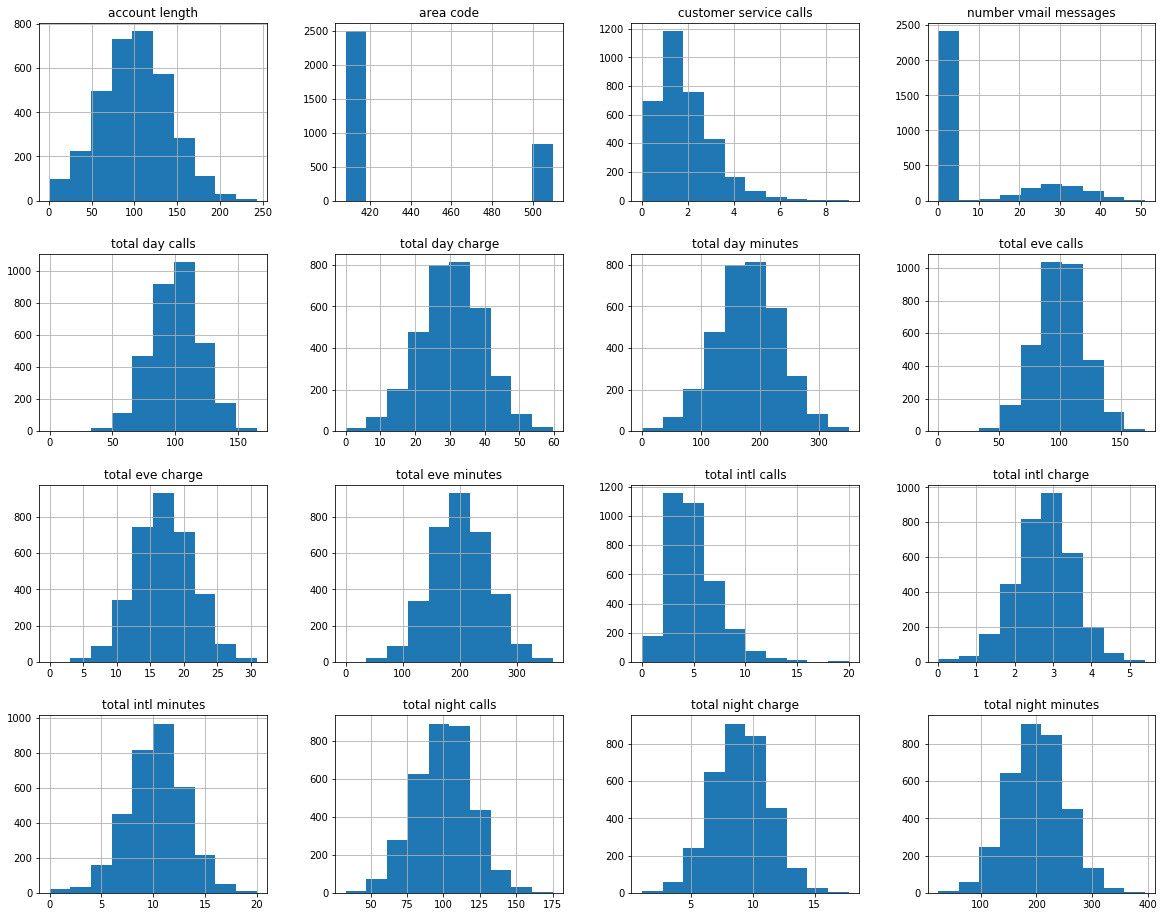

In [8]:
# Define which features are intergers/floats for histograms
hist_cols = ['account length',
             'area code',
             'number vmail messages',
             'total day minutes',
             'total day calls',
             'total day charge',
             'total eve minutes',
             'total eve calls',
             'total eve charge',
             'total night minutes',
             'total night calls',
             'total night charge',
             'total intl minutes',
             'total intl calls',
             'total intl charge',
             'customer service calls']

# Define figure size & axis
fig,ax = plt.subplots(figsize = (20,16))

# Plot histograms
df.hist(column=hist_cols,ax=ax);

Some of these features are skewed, e.g. customer service calls, international calls and international charges. 

We can see some of these appear to be directly correlated, which makes sense such as calls, charges and minutes. E.g. total day calls, charges, and minutes, international calls, charges and minutes, and night calls, charges and minutes. 

Since ensemble methods work best when predictors are as independent as possible, we will probably just keep one of each of the three when creating our ensemble.

Number of voicemail messages appears to be bimodal. We could bin them, but we'll see how the classifier goes and do so if necessary. 

### Correlation Matrix

We want to see which features are correlated so we can remove redundant predictors.

In [9]:
abs(df.corr())>0.75

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
area code,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number vmail messages,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total day minutes,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
total day calls,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
total day charge,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
total eve minutes,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
total eve calls,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
total eve charge,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
total night minutes,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False


It seems the 'charge' categories are highly correlated with their respective 'minutes' categories, so let's go ahead and drop those.

In [10]:
drop = ['total day charge','total eve charge','total intl charge']
df = df.drop(drop, axis=1)

Let's take a look at the features that are non-continuous objects. 

### Exploring Features

#### States

In [11]:
# Summary Stastics
df.state.describe()

count     3333
unique      51
top         WV
freq       106
Name: state, dtype: object

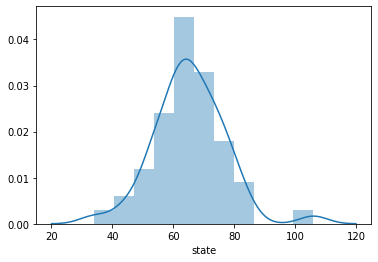

In [12]:
# Import Seaborn
import seaborn as sns

# Distribution Plot of State Value Counts
sns.distplot(df.state.value_counts());

It looks like all states are represented, some more than others with West Virginia being the max at 106 out of 3333. 

#### Area Code

415    1655
510     840
408     838
Name: area code, dtype: int64


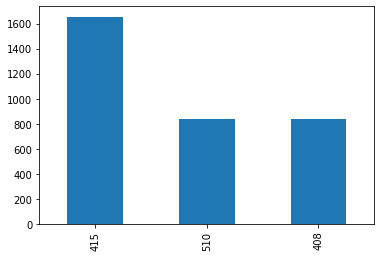

In [13]:
# Print area code value counts
print(df['area code'].value_counts())

# Plot bar plot of area code value counts
df['area code'].value_counts().plot(kind='bar');

It seems strange that with 51 states represented there are only 3 area codes. I did a little research as well as reading the dataset description and other kernels on kaggle, however this issue did not seem to be addressed anywhere. It could be that people had gotten a cell phone number in one state and then moved to another state. I'm not sure how likely that is, however this does seem like a relatively small data set at 3333, so it could be possible. 

#### Account Length

count    3333.0
mean      101.0
std        40.0
min         1.0
25%        74.0
50%       101.0
75%       127.0
max       243.0
Name: account length, dtype: float64


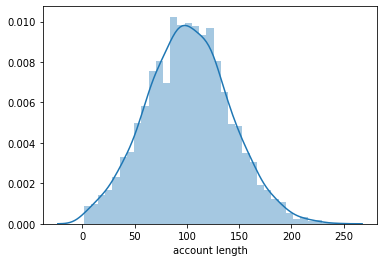

In [14]:
# Print account length summary statistics
print(df['account length'].describe().round())

# Plot distribution plot of account length
sns.distplot(df['account length']);

I'm not sure if account length is in weeks or months. It seems too long to be years and too short to be days. It could also be some other metric. I did research this as well, and it seemed another person had asked what the units were in kaggle on the dataset page, however the question was never answered. It was not addressed in any of the kernels either. 

I did some web research as well and did not find what the unit of length is on account length.

#### Churn: Target Variable

Let's explore our target variable, churn. 

Counts: 
False    2850
True      483
Name: churn, dtype: int64 

Normalized: 
False    0.86
True     0.14
Name: churn, dtype: float64 



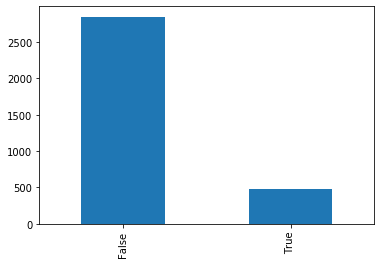

In [15]:
# Print Value Counts
print(f"Counts: \n{df.churn.value_counts()} \n")

# Print Normalized Value Counts
print(f"Normalized: \n{df.churn.value_counts(normalize=True).round(2)} \n")

# Plot Value Counts
df.churn.value_counts().plot(kind='bar');

We can see there is a class imbalance here, so we'll want to address that by balancing the classes. We'll use SMOTE further down to accomplish this aim. 

## Pre-processing

### One-Hot-Encode Categorical Data

An alternative would be to use sklearn's OneHotEncoder or LabelEncoder.

In [16]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total night charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,197.4,99,244.7,91,11.01,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,195.5,103,254.4,103,11.45,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,121.2,110,162.6,104,7.32,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,61.9,88,196.9,89,8.86,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,148.3,122,186.9,121,8.41,...,0,0,0,0,0,0,0,0,1,0


### Separate Target & Predictor Variables

In [17]:
# Define X and y variables
y = df['churn']
X = df.drop(['churn'], axis=1)

# Define Random State
seed = 20

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

### Address Class Imbalance

Address the class imbalance using SMOTE to synthetically oversample the minority class.

In [18]:
# Import necessary package
from imblearn.over_sampling import SMOTE

# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

# Preview synthetic sample class distribution
print(f"\n{pd.Series(y_train_resampled).value_counts()}") 

False    2136
True      363
Name: churn, dtype: int64

True     2136
False    2136
dtype: int64


Let's start modeling...

## Modeling

### Logistic Regression Classifier

#### Fit Model & Predict

In [19]:
# Import relevant packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Instantiate and fit model
logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear') 
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_hat_test = logreg.predict(X_test)

# Check false positive and true positive rates
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#### ROC Curve

Test Set AUC: 0.8074


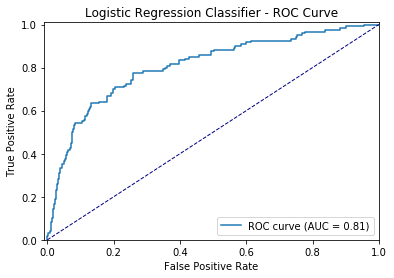

In [20]:
# Plot ROC curve

# Define function to plot ROC curve for classifiers
def ROC_curve(fpr,tpr,string):
    '''
    Input false positive rate, true positive rate and string
    to describe the classifier that was used.
    
    Returns ROC curve with AUC in lower right hand corner.
    
    '''
    # ROC curve
    plt.plot(fpr,tpr,label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
    # Threshold
    plt.plot([0, 1], [0, 1], color='navy', lw=1.0, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    # Labels & Title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{string} - ROC Curve')
    plt.legend(loc="lower right");
    
    # Print AUC
    print(f"Test Set AUC: {auc(fpr, tpr).round(4)}")
    
ROC_curve(fpr,tpr,'Logistic Regression Classifier')

#### Confusion Matrix & Accuracy Scores


 Confusion Matrix - Normalized: 
 


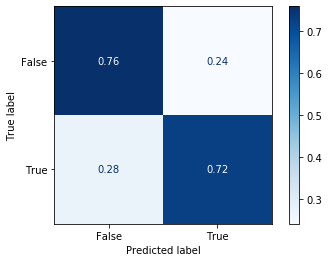

Confusion Matrix - Counts: 

 [[542 172]
 [ 33  87]] 


Classification Report: 

               precision    recall  f1-score   support

       False       0.94      0.76      0.84       714
        True       0.34      0.72      0.46       120

    accuracy                           0.75       834
   macro avg       0.64      0.74      0.65       834
weighted avg       0.86      0.75      0.79       834
 
 
Accuracy Score: 

 0.7542


In [21]:
# Import relevant package
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

# Define function to return confusion matrix plots and classification report
def cms_and_report(y_test,y_hat_test,model):
    '''
    Print out and plot confusion matrices and classification report
    for model.
    
    Input y_test, y_hat_test & model.
    '''

    # Plot confusion matrix & normalize the True Label for False & True
    print(f"\n Confusion Matrix - Normalized: \n ")
    plot_confusion_matrix(model, X_test, y_test,cmap='Blues',normalize='true')
    plt.show()
    
    # Print confusion matrix by counts
    print(f"Confusion Matrix - Counts: \n\n {confusion_matrix(y_test, y_hat_test)} \n\n")
    
    # Print Classification Report
    print(f"Classification Report: \n\n {classification_report(y_test, y_hat_test)} \n ")
    
    # Accuracy Score
    print(f"Accuracy Score: \n\n {accuracy_score(y_test, y_hat_test).round(4)}")
    
# Return for Logistic Regression Classifier    
cms_and_report(y_test,y_hat_test,logreg)

#### Confusion Matrix & Accuracy Scores


 Confusion Matrix - Normalized: 
 


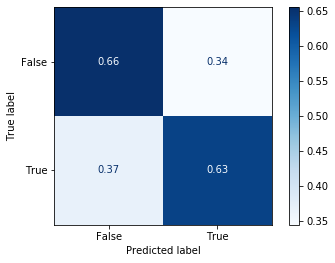

Confusion Matrix - Counts: 

 [[468 246]
 [ 44  76]] 


Classification Report: 

               precision    recall  f1-score   support

       False       0.91      0.66      0.76       714
        True       0.24      0.63      0.34       120

    accuracy                           0.65       834
   macro avg       0.58      0.64      0.55       834
weighted avg       0.82      0.65      0.70       834
 
 
Accuracy Score: 

 0.6523


In [24]:
# Print confusion matrices and classification report
cms_and_report(y_test,y_pred,knn_clf)

### Bagging Tree Classifier

#### Fit Model & Predict

In [25]:
# Import classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate Classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    random_state=seed)

# Build Model
bag_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the Test Set
y_pred = bag_clf.predict(X_test)

# Check false positive and true positive rates
y_score = bag_clf.fit(X_train_resampled, y_train_resampled).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

#### ROC Curve

Test Set AUC: 0.9256


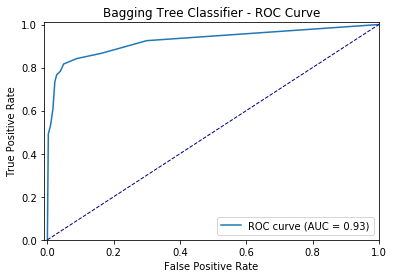

In [26]:
# Plot ROC curve for Bagging Tree Classifier
ROC_curve(fpr,tpr,'Bagging Tree Classifier')

#### Confusion Matrix & Accuracy Scores


 Confusion Matrix - Normalized: 
 


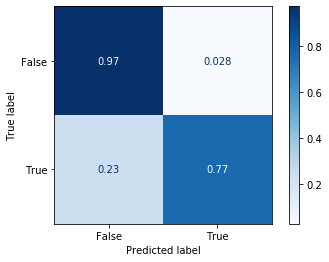

Confusion Matrix - Counts: 

 [[694  20]
 [ 28  92]] 


Classification Report: 

               precision    recall  f1-score   support

       False       0.96      0.97      0.97       714
        True       0.82      0.77      0.79       120

    accuracy                           0.94       834
   macro avg       0.89      0.87      0.88       834
weighted avg       0.94      0.94      0.94       834
 
 
Accuracy Score: 

 0.9424


In [27]:
# Print confusion matrices and classification report
cms_and_report(y_test,y_pred,bag_clf)

### Random Forest Classifier

#### Cross-validation

I'm going to test different values of crossvalidation k-folds to see which results in the highest accuracy value.

In [28]:
# Import necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cv_vals = [3,6,10]

for cv_val in cv_vals:
    rf_clf = RandomForestClassifier(random_state=seed)
    mean_rf_cv_score = np.mean(cross_val_score(rf_clf, 
                                               X_train_resampled, 
                                               y_train_resampled, 
                                               cv=cv_val))

    print(f"Mean Cross Validation Score for cv={cv_val}: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for cv=3: 95.22%
Mean Cross Validation Score for cv=6: 95.69%
Mean Cross Validation Score for cv=10: 96.49%


We can see that higher cross-validation k-folds result in higher accuracy. 

#### Fit Model & Predict

In [29]:
# Instantiate Model
rnd_clf = RandomForestClassifier(random_state=seed)

# Fit Model
rnd_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rnd_clf.predict(X_test)

# Check false positive and true positive rates
y_score = rnd_clf.fit(X_train_resampled, y_train_resampled).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

#### ROC Curve

Test Set AUC: 0.9229


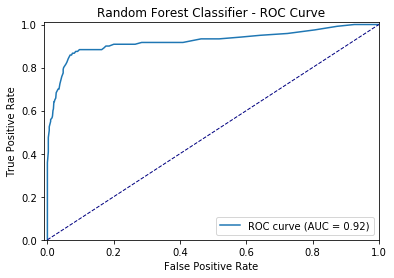

In [30]:
# Plot ROC curve
ROC_curve(fpr,tpr,'Random Forest Classifier')

#### Confusion Matrix & Accuracy Scores


 Confusion Matrix - Normalized: 
 


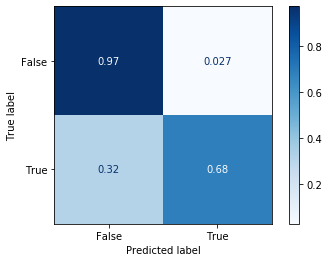

Confusion Matrix - Counts: 

 [[695  19]
 [ 38  82]] 


Classification Report: 

               precision    recall  f1-score   support

       False       0.95      0.97      0.96       714
        True       0.81      0.68      0.74       120

    accuracy                           0.93       834
   macro avg       0.88      0.83      0.85       834
weighted avg       0.93      0.93      0.93       834
 
 
Accuracy Score: 

 0.9317


In [31]:
# Print out confusion matrix & classification report
cms_and_report(y_test,y_pred_rf,rnd_clf)

### SVC Classifier

#### Fit Model & Predict

In [32]:
# Import relevant package
from sklearn.svm import SVC

# Instatiate classifier
svc_clf = SVC(random_state=seed) 

# Fit model
svc_clf.fit = svc_clf.fit(X_train_resampled, y_train_resampled)

# Predict on train & test sets
train_preds = svc_clf.predict(X_train_resampled)
test_preds = svc_clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_resampled,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)

# Print accuracy scores
print("Train Accuracy: {:.4}%".format(train_accuracy * 100))
print("Test Accuracy: {:.4}%".format(test_accuracy * 100))

# Check false positive and true positive rates
fpr, tpr, thresholds = roc_curve(y_test,test_preds)

Train Accuracy: 65.87%
Test Accuracy: 83.45%


#### ROC Curve

Test Set AUC: 0.7404


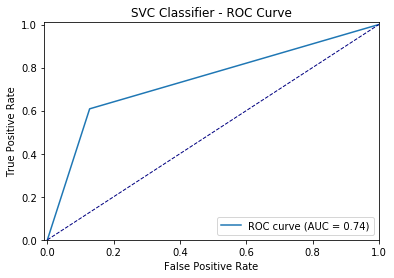

In [33]:
# Print ROC curve for SVC Classifier
ROC_curve(fpr,tpr,'SVC Classifier')

#### Confusion Matrix & Classification Report


 Confusion Matrix - Normalized: 
 


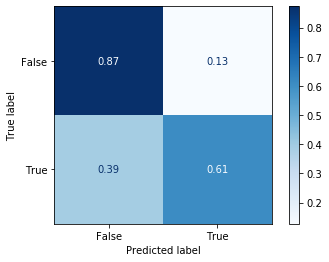

Confusion Matrix - Counts: 

 [[623  91]
 [ 47  73]] 


Classification Report: 

               precision    recall  f1-score   support

       False       0.93      0.87      0.90       714
        True       0.45      0.61      0.51       120

    accuracy                           0.83       834
   macro avg       0.69      0.74      0.71       834
weighted avg       0.86      0.83      0.84       834
 
 
Accuracy Score: 

 0.8345


In [34]:
# Print confusion matrices and classification report
cms_and_report(y_test,test_preds,svc_clf)

### XGBoost Classifier

#### Fit Model & Predict

XGBoost was returning an error that the feature names did not match. In order to rectify this, I had to split just the values without headers. So I resplit the data here using the same random state number and test size. 

In [35]:
# Import relevant package
import xgboost as xgb

# Instatiate classifier
xgb_clf = xgb.XGBClassifier(random_state=seed) 

# Splitting with X & y in np.array format for xgboost
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=seed)

# Fit SMOTE to training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

# Fit model
xgb_clf.fit = xgb_clf.fit(X_train_resampled, y_train_resampled)

# Predict on train & test sets
train_preds = xgb_clf.predict(X_train_resampled)
test_preds = xgb_clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train_resampled,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)

# Print accuracy scores
print("Train Accuracy: {:.4}%".format(train_accuracy * 100))
print("Test Accuracy: {:.4}%".format(test_accuracy * 100))

# Check false positive and true positive rates
fpr, tpr, thresholds = roc_curve(y_test,test_preds)

Train Accuracy: 95.74%
Test Accuracy: 93.29%


#### ROC Curve

Test Set AUC: 0.8672


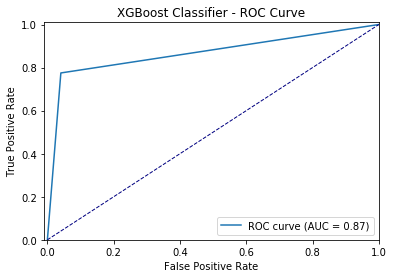

In [36]:
# Plot ROC curve
ROC_curve(fpr,tpr,'XGBoost Classifier')

#### Confusion Matrix & Accuracy Scores


 Confusion Matrix - Normalized: 
 


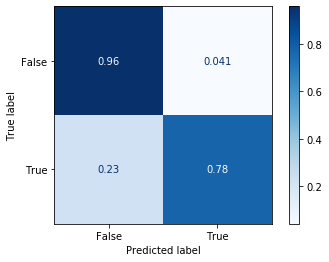

Confusion Matrix - Counts: 

 [[685  29]
 [ 27  93]] 


Classification Report: 

               precision    recall  f1-score   support

       False       0.96      0.96      0.96       714
        True       0.76      0.78      0.77       120

    accuracy                           0.93       834
   macro avg       0.86      0.87      0.86       834
weighted avg       0.93      0.93      0.93       834
 
 
Accuracy Score: 

 0.9329


In [37]:
# Print confusion matrices and classification report
cms_and_report(y_test,test_preds,xgb_clf)

### Conclusion for Baseline Classifiers

- Since we want to target our marketing efforts to customers likely to churn, the most important measurement is the sensitivty, or the true positive rate.

- It's okay if we have false positives, becasue the focus is on customer retention. We want to focus on retaining customers likely to churn, so if we have any false positives, that's no problem at all.

- We want to minimize false negatives and maximize true positives.

- While XGBoost and Random Forest classifiers had the best accuracy scores, our Bagging Tree Classifier performed the best for our purposes. Our Bagging Tree Classifier had the highest True Positive Rate and the lowest False Negative Rate out of all of our tested classifiers.

- The recall score for true is the most important accuracy score to consider for our purposes. 

Let's go ahead and tune our top 3 best performing models to see if we can improve them.

## Hyperparameter Tuning

We're now going to tune the hyperparameters of our top 3 performing models to see if we can improve them. I'm going to use GridSearchCV to search for the best values for our hyperparamters, and I'm going to tune for highest recall score.

In [38]:
# Import necessary packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

### Bagging Classifier

We will now create a Bagging Classifier of Decision Trees.

#### Grid Search

In [ ]:
param_grid = {
'n_estimators': [5, 10, 15],
'max_samples' : [0.6, 0.8, 1.0],
'base_estimator__bootstrap': [True, False],
'base_estimator__n_estimators': [100, 300, 500],
'base_estimator__max_features' : [0.6, 0.8, 1.0]
}

b_clf_grid_search=GridSearchCV(BaggingClassifier(base_estimator=RandomForestClassifier()), 
                               param_grid=param_grid, 
                               cv=3,
                               scoring = 'recall')

b_clf_grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
print(f"Training Accuracy: {b_clf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {b_clf_grid_search.best_params_}")

### Random Forest Classifier

#### Grid Search

In [ ]:
rf_param_grid = {'n_estimators': [10, 100, 500],
                 'criterion': ['gini', 'entropy'],
                 'max_leaf_nodes': [10, 60],
                 'min_samples_split': [1, 2, 5],
                 'min_samples_leaf': [1, 2, 3]}

In [ ]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, scoring = 'recall')
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

In [ ]:
# Instantiate model w/optimal parameters
rnd_clf_best = RandomForestClassifier(criterion='gini',
                                 min_samples_leaf=1,
                                 min_samples_split=2,
                                 n_estimators=100,
                                 random_state=seed)

# Fit model
rnd_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf_best = rnd_clf_best.predict(X_test)

# Check false positive and true positive rates
y_score_best = rnd_clf.fit(X_train_resampled, y_train_resampled).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score_best[:, 1])

In [ ]:
# Plot ROC curve
ROC_curve(fpr,tpr,'Random Forest Classifier')

In [ ]:
# Print out confusion matrix & classification report
cms_and_report(y_test,y_pred_rf_best,rnd_clf_best)

### XGBoost Classifier

## Conclusion

## Recommendations

## Future Work